In [27]:
import pandas as pd
df = pd.read_csv("penguins.csv")
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [29]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [30]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [32]:
df['Sex_Imputed'] = df['sex'].fillna(df['sex'].mode()[0])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Sex_Imputed
0,39.1,18.7,181.0,3750.0,MALE,MALE
1,39.5,17.4,186.0,3800.0,FEMALE,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE,FEMALE
3,NaN,NaN,NaN,NaN,NaN,MALE
4,36.7,19.3,193.0,3450.0,FEMALE,FEMALE


In [35]:
df.drop(columns="sex",axis = 1, inplace = True)

In [36]:
df.head

<bound method NDFrame.head of      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
3                 NaN              NaN                NaN          NaN   
4                36.7             19.3              193.0       3450.0   
..                ...              ...                ...          ...   
339               NaN              NaN                NaN          NaN   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

    Sex_Imputed  
0          MALE  
1        FEMALE  
2        FEMALE  
3        

In [37]:
df.fillna(df.mean(), inplace=True)

C:\Users\nabil\AppData\Local\Temp\ipykernel_18324\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [38]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
Sex_Imputed          0
dtype: int64

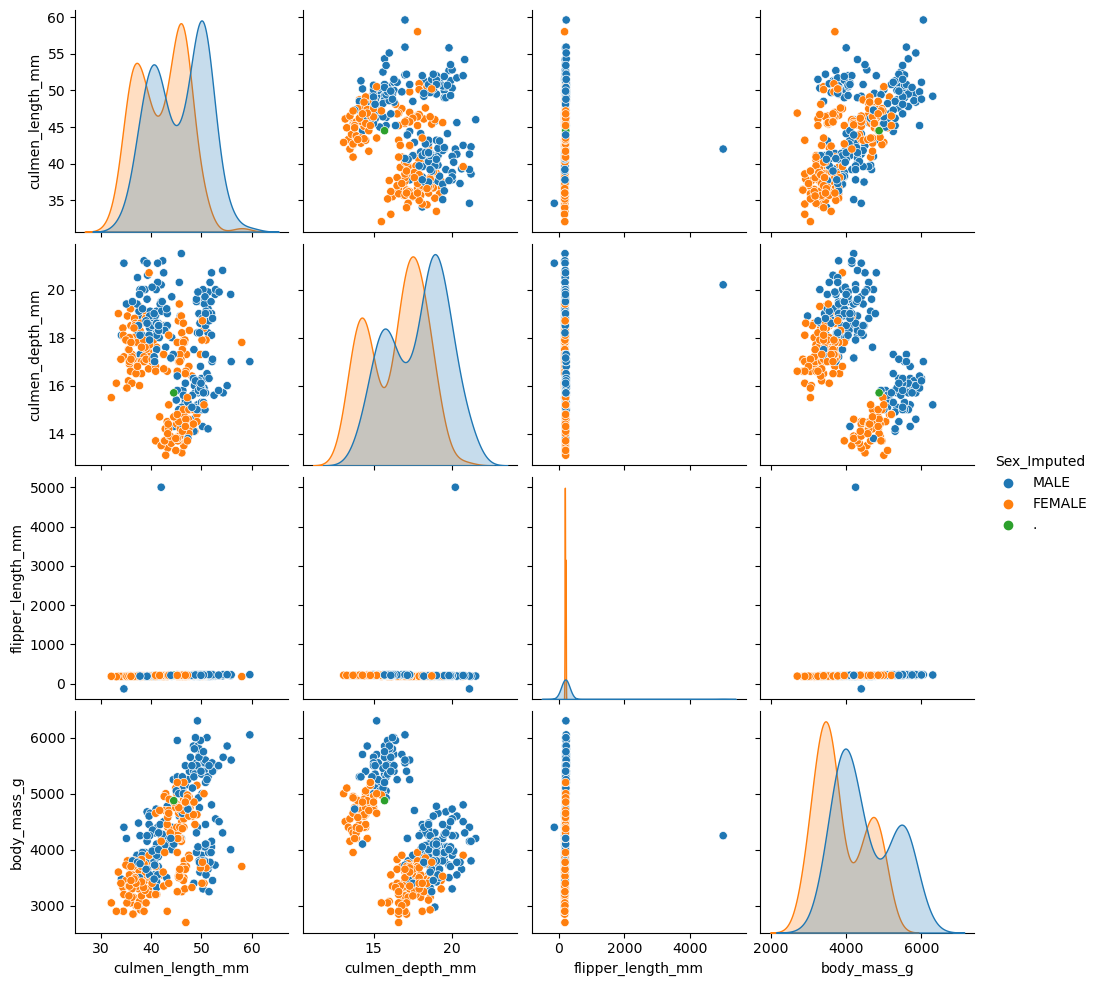

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see the relationships and distributions
sns.pairplot(df, hue="Sex_Imputed")
plt.show()

HIERARCHICAL CLUSTERING

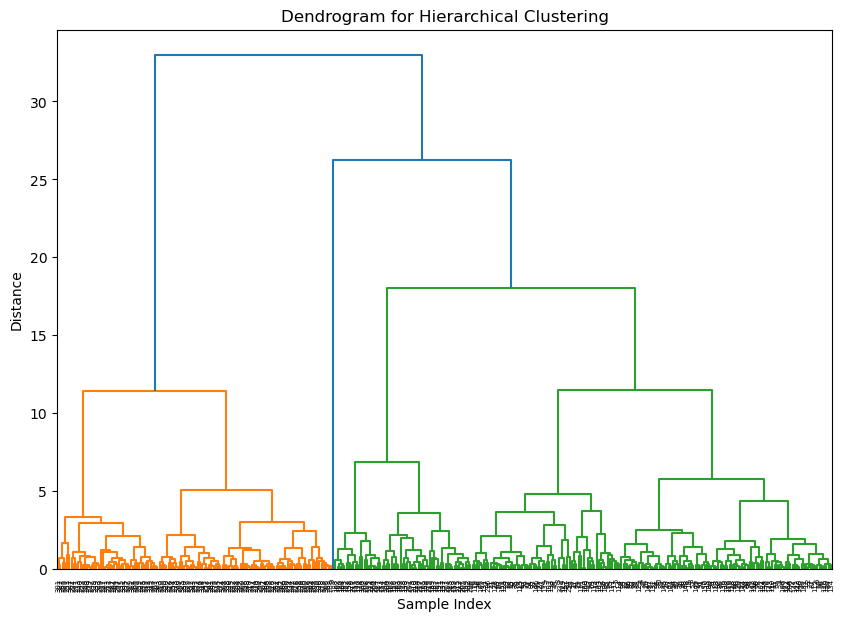

In [43]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Sex_Imputed', axis=1))

# Hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

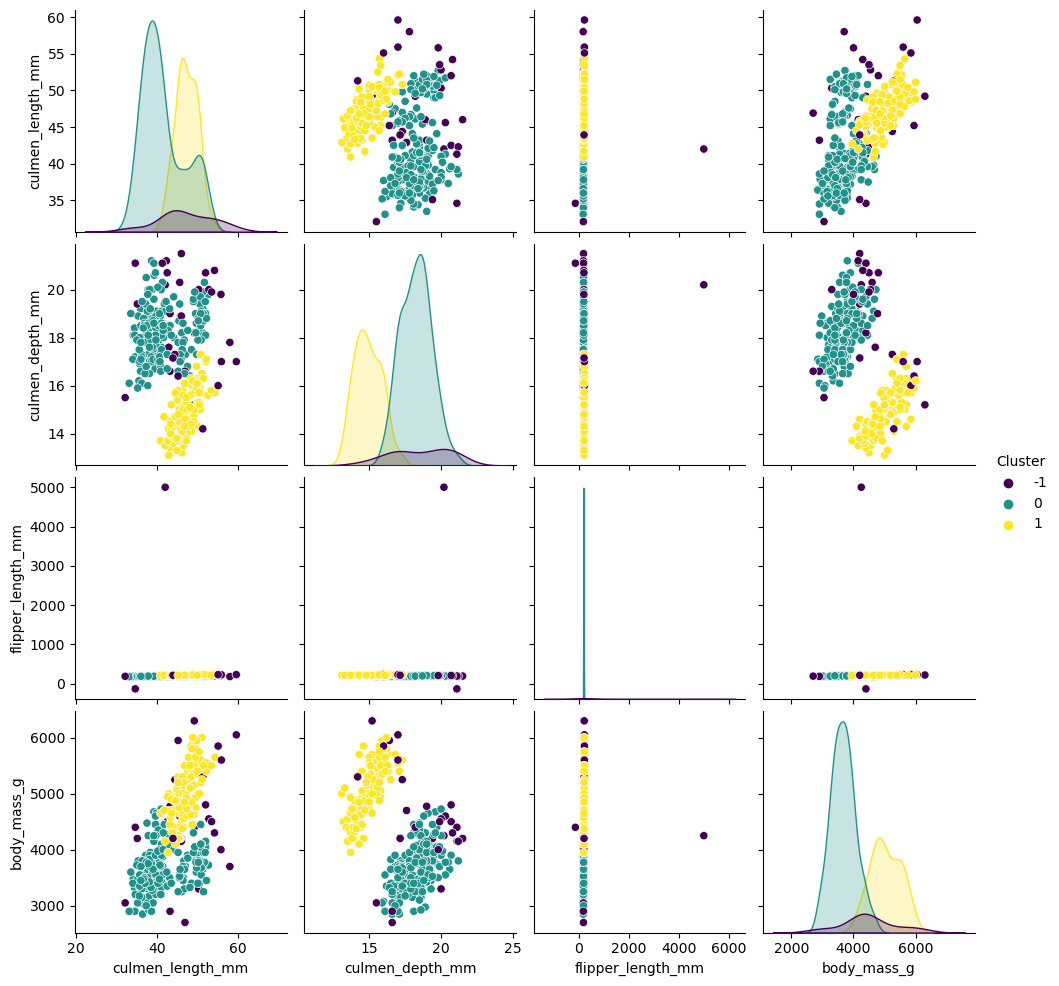

In [45]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
Sex_Imputed           object
Cluster                int64
dtype: object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
Sex_Imputed           object
Cluster                int64
dtype: object


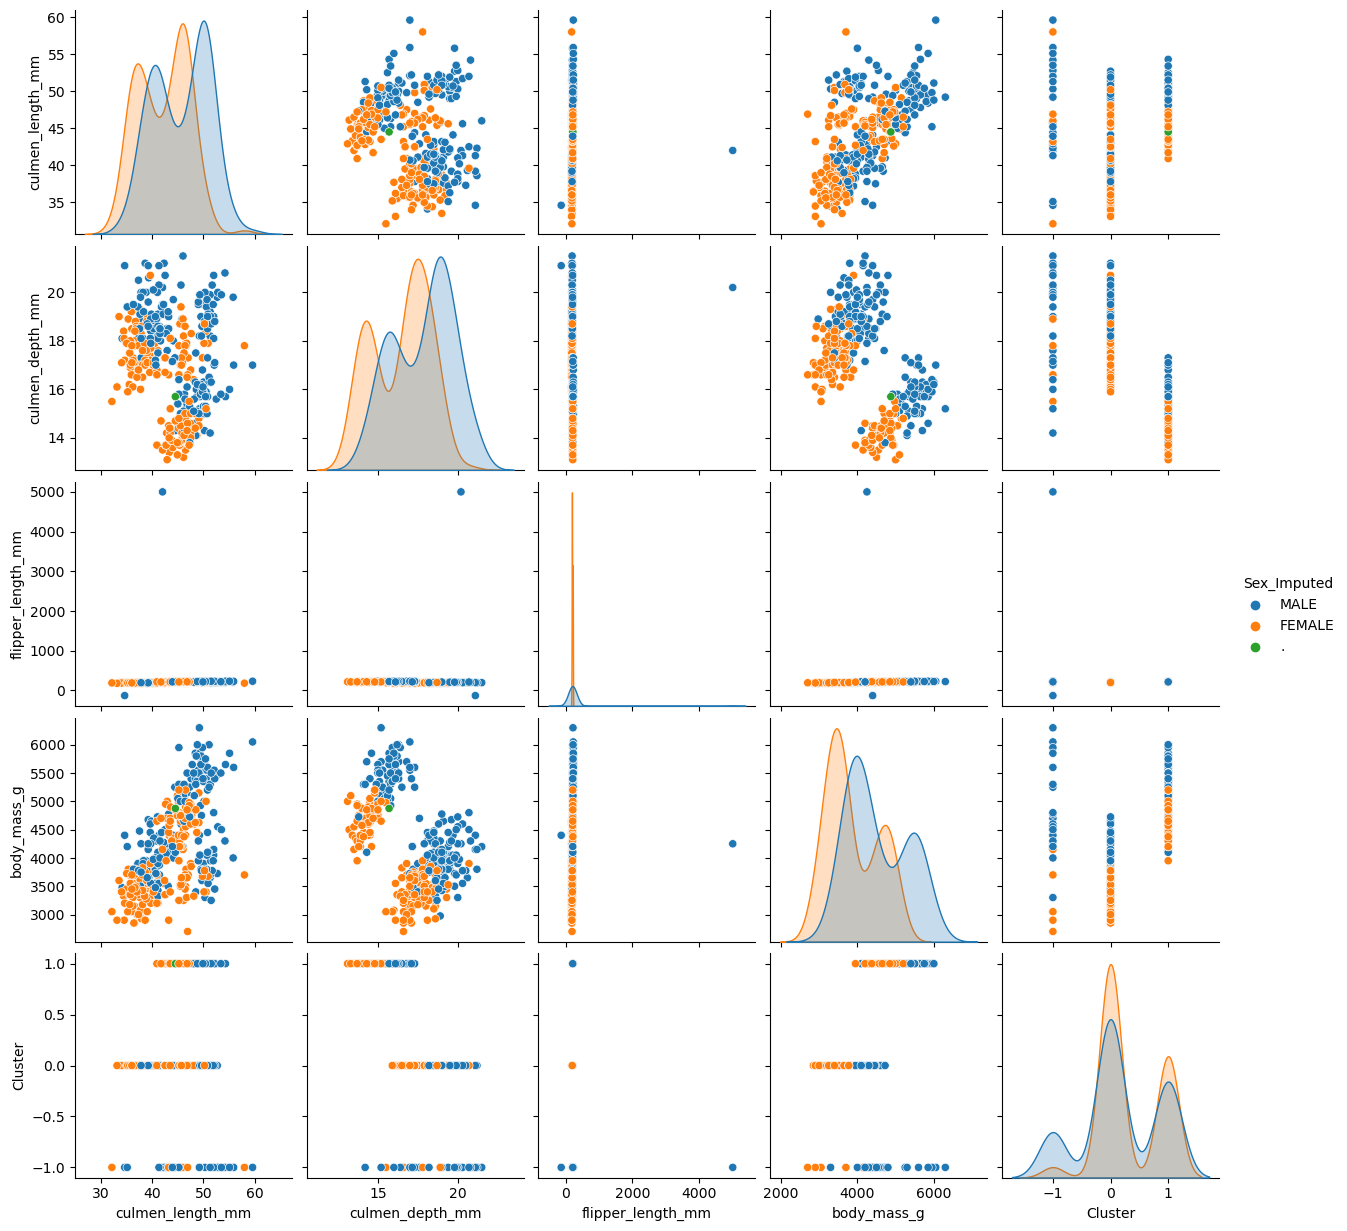

In [48]:
# Check the data types of each column
print(df.dtypes)

# Convert any non-numeric columns that should be numeric
df['culmen_length_mm'] = pd.to_numeric(df['culmen_length_mm'], errors='coerce')
df['culmen_depth_mm'] = pd.to_numeric(df['culmen_depth_mm'], errors='coerce')
df['flipper_length_mm'] = pd.to_numeric(df['flipper_length_mm'], errors='coerce')
df['body_mass_g'] = pd.to_numeric(df['body_mass_g'], errors='coerce')

# Verify no non-numeric values remain
print(df.dtypes)

import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see the relationships and distributions
sns.pairplot(df, hue='Sex_Imputed')
plt.show()